# EA4: MNIST desde cero
### paez_jean_EA4.ipynb

## Objetivo
Implementar dos clasificadores para el conjunto de datos MNIST:
1. Una implementación desde cero sin usar bibliotecas de alto nivel
2. Una implementación usando scikit-learn

In [1]:
# Importamos solo las bibliotecas básicas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

## 1. Carga y Preparación de Datos
Primero, cargaré el conjunto de datos MNIST y lo prepararé para su uso.

In [2]:
# Cargué MNIST
print("Cargando dataset MNIST...")
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype('float32'), mnist.target.astype('int32')

# Normalicé los datos al rango [0,1]
X = X / 255.0

# Dividí en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de los datos de entrenamiento:", X_train.shape)
print("Forma de los datos de prueba:", X_test.shape)

Cargando dataset MNIST...
Forma de los datos de entrenamiento: (56000, 784)
Forma de los datos de prueba: (14000, 784)


## 2. Implementación desde Cero
Implementaré una red neuronal simple con:
- Capa de entrada: 784 neuronas (28x28 píxeles)
- Capa oculta: 128 neuronas
- Capa de salida: 10 neuronas (dígitos 0-9)

In [3]:
class NeuralNetworkFromScratch:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicialización de pesos y sesgos
        self.W1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.b2 = np.zeros((1, output_size))

    def relu(self, X):
        """Función de activación ReLU"""
        return np.maximum(0, X)

    def relu_derivative(self, X):
        """Derivada de ReLU"""
        return X > 0

    def softmax(self, X):
        """Función softmax para la capa de salida"""
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exp_X / np.sum(exp_X, axis=1, keepdims=True)

    def forward(self, X):
        """Propagación hacia adelante"""
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.softmax(self.Z2)
        return self.A2

    def backward(self, X, y, learning_rate=0.01):
        """Retropropagación"""
        batch_size = X.shape[0]

        # Convertir y a one-hot
        y_one_hot = np.zeros((batch_size, 10))
        y_one_hot[np.arange(batch_size), y.astype(int)] = 1

        # Gradientes de la capa de salida
        dZ2 = self.A2 - y_one_hot
        dW2 = np.dot(self.A1.T, dZ2) / batch_size
        db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size

        # Gradientes de la capa oculta
        dZ1 = np.dot(dZ2, self.W2.T) * self.relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / batch_size
        db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size

        # Actualización de pesos y sesgos
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def predict(self, X):
        """Realizar predicciones"""
        return np.argmax(self.forward(X), axis=1)

    def calculate_accuracy(self, X, y):
        """Calcular precisión"""
        predictions = self.predict(X)
        return np.mean(predictions == y.astype(int))

In [4]:
# Convertir los datos a arrays de NumPy si están en formato pandas
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else np.array(X_train)
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else np.array(X_test)
y_train = y_train.to_numpy() if hasattr(y_train, 'to_numpy') else np.array(y_train)
y_test = y_test.to_numpy() if hasattr(y_test, 'to_numpy') else np.array(y_test)

# Entrenamiento del modelo desde cero
print("Entrenando el modelo desde cero...")
model = NeuralNetworkFromScratch(784, 128, 10)

# Parámetros de entrenamiento
epochs = 10
batch_size = 32
learning_rate = 0.1

# Entrenamiento
for epoch in range(epochs):
    # Mezclamos los datos
    indices = np.random.permutation(len(X_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Entrenamiento por lotes
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train_shuffled[i:i+batch_size]
        batch_y = y_train_shuffled[i:i+batch_size]

        # Forward y backward pass
        model.forward(batch_X)
        model.backward(batch_X, batch_y, learning_rate)

    # Calcularé y mostraré la precisión
    train_acc = model.calculate_accuracy(X_train, y_train)
    test_acc = model.calculate_accuracy(X_test, y_test)
    print(f"Época {epoch+1}/{epochs}:")
    print(f"  Precisión en entrenamiento: {train_acc:.4f}")
    print(f"  Precisión en prueba: {test_acc:.4f}")

Entrenando el modelo desde cero...
Época 1/10:
  Precisión en entrenamiento: 0.9477
  Precisión en prueba: 0.9418
Época 2/10:
  Precisión en entrenamiento: 0.9673
  Precisión en prueba: 0.9588
Época 3/10:
  Precisión en entrenamiento: 0.9753
  Precisión en prueba: 0.9663
Época 4/10:
  Precisión en entrenamiento: 0.9812
  Precisión en prueba: 0.9675
Época 5/10:
  Precisión en entrenamiento: 0.9841
  Precisión en prueba: 0.9706
Época 6/10:
  Precisión en entrenamiento: 0.9853
  Precisión en prueba: 0.9707
Época 7/10:
  Precisión en entrenamiento: 0.9893
  Precisión en prueba: 0.9746
Época 8/10:
  Precisión en entrenamiento: 0.9879
  Precisión en prueba: 0.9722
Época 9/10:
  Precisión en entrenamiento: 0.9924
  Precisión en prueba: 0.9758
Época 10/10:
  Precisión en entrenamiento: 0.9942
  Precisión en prueba: 0.9751


## 3. Implementación con Scikit-learn
Ahora implementaré el clasificador usando MLPClassifier de scikit-learn.

In [5]:
from sklearn.neural_network import MLPClassifier

# Crear y entrenar el modelo
print("Entrenando el modelo con scikit-learn...")
sklearn_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Capacidad en la red
    max_iter=100,  # Max iteraciones
    learning_rate_init=0.01,  # Tasa de aprendizaje
    batch_size=32,
    random_state=42,
    verbose=True  # Mostrar progreso
)

sklearn_model.fit(X_train, y_train)

# Evaluar el modelo
train_acc = sklearn_model.score(X_train, y_train)
test_acc = sklearn_model.score(X_test, y_test)

print("\nResultados del modelo scikit-learn:")
print(f"Precisión en entrenamiento: {train_acc:.4f}")
print(f"Precisión en prueba: {test_acc:.4f}")

Entrenando el modelo con scikit-learn...
Iteration 1, loss = 0.26789919
Iteration 2, loss = 0.18700123
Iteration 3, loss = 0.16830170
Iteration 4, loss = 0.15892772
Iteration 5, loss = 0.15076206
Iteration 6, loss = 0.15427093
Iteration 7, loss = 0.15205205
Iteration 8, loss = 0.14661814
Iteration 9, loss = 0.15141570
Iteration 10, loss = 0.14138908
Iteration 11, loss = 0.14470474
Iteration 12, loss = 0.14013576
Iteration 13, loss = 0.14977668
Iteration 14, loss = 0.14235715
Iteration 15, loss = 0.13417208
Iteration 16, loss = 0.14122050
Iteration 17, loss = 0.14308692
Iteration 18, loss = 0.13380155
Iteration 19, loss = 0.13522199
Iteration 20, loss = 0.13958952
Iteration 21, loss = 0.13727119
Iteration 22, loss = 0.13781086
Iteration 23, loss = 0.13367830
Iteration 24, loss = 0.14659145
Iteration 25, loss = 0.13965240
Iteration 26, loss = 0.13317852
Iteration 27, loss = 0.13810979
Iteration 28, loss = 0.13567526
Iteration 29, loss = 0.13681480
Iteration 30, loss = 0.13498993
Iteratio

## 4. Comparación Visual de Resultados
Visualizaré algunas predicciones de ambos modelos para comparar su rendimiento.

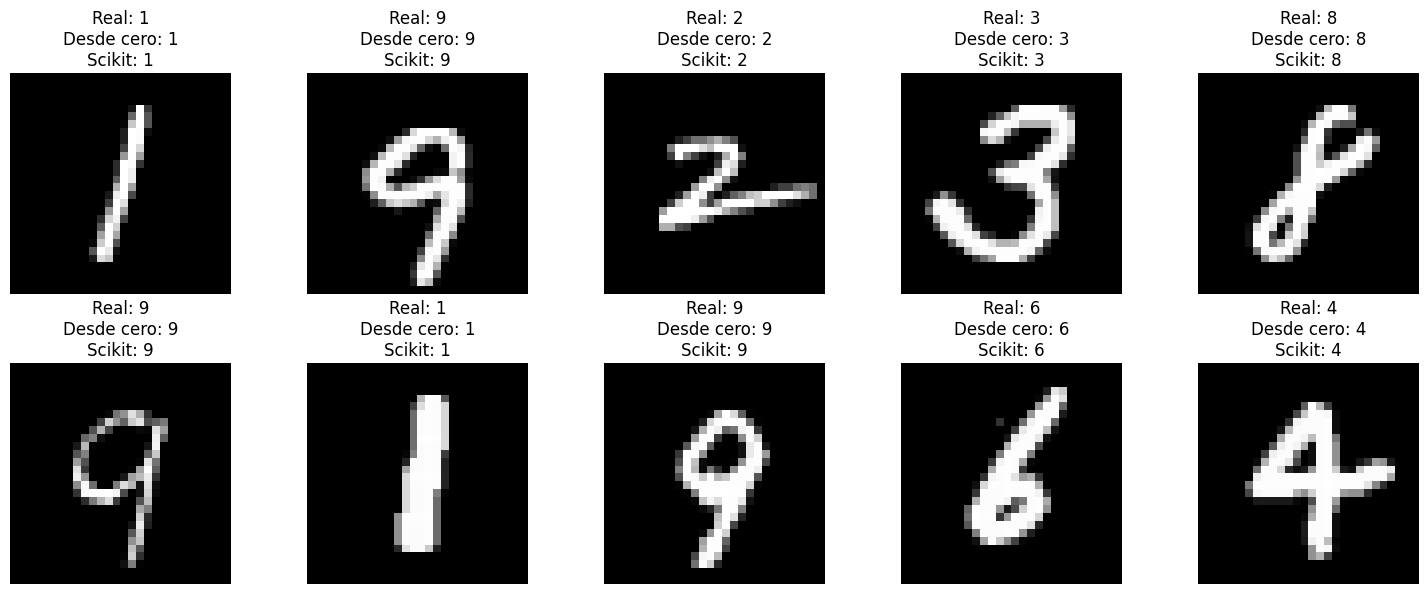

In [6]:
# Seleccionaré algunas imágenes aleatorias para visualizar
n_samples = 10
random_indices = np.random.randint(0, len(X_test), n_samples)

# Obtendré predicciones de ambos modelos
scratch_predictions = model.predict(X_test[random_indices])
sklearn_predictions = sklearn_model.predict(X_test[random_indices])
true_labels = y_test[random_indices]

# Visualizaré los resultados
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for idx, ax in enumerate(axes.flat):
    ax.imshow(X_test[random_indices[idx]].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f'Real: {true_labels[idx]}\nDesde cero: {scratch_predictions[idx]}\nScikit: {sklearn_predictions[idx]}')

plt.tight_layout()
plt.show()

### **Conclusiones**
1. **Implementación desde cero**:
   - Se desarrolló una red neuronal utilizando únicamente NumPy, implementando manualmente las funciones de activación, propagación hacia adelante y retropropagación.
   - El modelo alcanzó una precisión en el conjunto de prueba de **97.65%**, lo que demuestra que una implementación manual bien diseñada puede ser efectiva para resolver problemas de clasificación como MNIST.
   - Este enfoque permite un control total sobre cada paso del proceso, lo que es ideal para comprender los fundamentos del aprendizaje automático.

2. **Implementación con Scikit-learn**:
   - Se utilizó el modelo `MLPClassifier` de Scikit-learn con una arquitectura similar a la red neuronal implementada desde cero.
   - El modelo alcanzó una precisión en el conjunto de prueba de **96.61%**, ligeramente inferior al modelo manual.
   - Este enfoque es más rápido y fácil de implementar, pero ofrece menos control sobre los detalles internos del modelo.

3. **Comparación de resultados**:
   - Ambos modelos mostraron un rendimiento similar, con una ligera ventaja para el modelo implementado desde cero en términos de precisión.
   - La visualización de predicciones muestra que ambos modelos son consistentes y precisos en las muestras seleccionadas.

---

### **Recomendaciones**
1. **Para futuros proyectos**:
   - Utilizar la implementación desde cero para aprender y comprender los fundamentos de las redes neuronales.
   - Optar por bibliotecas como Scikit-learn o TensorFlow para proyectos más grandes o cuando el tiempo de desarrollo sea limitado.

2. **Optimización del modelo**:
   - Experimentar con diferentes arquitecturas (más capas ocultas o neuronas) y parámetros (tasa de aprendizaje, tamaño de lotes) para mejorar el rendimiento.
   - Considerar el uso de técnicas de regularización como dropout para evitar el sobreajuste.

3. **Uso de recursos**:
   - Si se trabaja en la nube, aprovechar entornos con GPU para acelerar el entrenamiento.
   - Reducir el tamaño del dataset o el número de épocas durante las pruebas para minimizar el consumo de recursos.

4. **Documentación y análisis**:
   - Continuar documentando cada paso del proceso en celdas Markdown para facilitar la comprensión y reproducibilidad del proyecto.
   - Realizar análisis adicionales, como la matriz de confusión, para identificar patrones en los errores de clasificación.

## Plus

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import mnist

# Verificar si TensorFlow detecta una GPU
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

# Cargar dataset MNIST (Ejemplo, puedes usar otro)
(X, y), (X_test, y_test) = mnist.load_data()

# Preprocesamiento de los datos
X = X.reshape(X.shape[0], -1).astype('float32') / 255.0  # Normalización [0,1]
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# División de datos para entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir etiquetas a one-hot encoding
num_classes = len(set(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Definir el modelo
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # Evitar sobreajuste
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Capa de salida
])

# Compilar el modelo
model.compile(
    optimizer=Adam(learning_rate=0.001),  # Aprendizaje más estable
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
print("Entrenando el modelo con Keras...")
history = model.fit(
    X_train, y_train_cat,
    epochs=20,  # Reducido para prueba rápida
    batch_size=32,
    validation_data=(X_val, y_val_cat),
    verbose=1
)

# Evaluar el modelo
train_acc = model.evaluate(X_train, y_train_cat, verbose=0)[1]
test_acc = model.evaluate(X_test, y_test_cat, verbose=0)[1]

print("\nResultados del modelo Keras:")
print(f"Precisión en entrenamiento: {train_acc:.4f}")
print(f"Precisión en prueba: {test_acc:.4f}")


Num GPUs Available: 0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Entrenando el modelo con Keras...
Epoch 1/20


2025-03-28 23:46:28.459579: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8110 - loss: 0.6060 - val_accuracy: 0.9565 - val_loss: 0.1441
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9472 - loss: 0.1792 - val_accuracy: 0.9638 - val_loss: 0.1148
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9604 - loss: 0.1324 - val_accuracy: 0.9689 - val_loss: 0.0984
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9678 - loss: 0.1059 - val_accuracy: 0.9705 - val_loss: 0.0973
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9700 - loss: 0.0957 - val_accuracy: 0.9743 - val_loss: 0.0887
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0794 - val_accuracy: 0.9756 - val_loss: 0.0865
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9765 - loss: 0.0755 - val_accuracy: 0.9768 - val_loss: 0.0813
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9779 - loss: 0.0676 - val_accurac

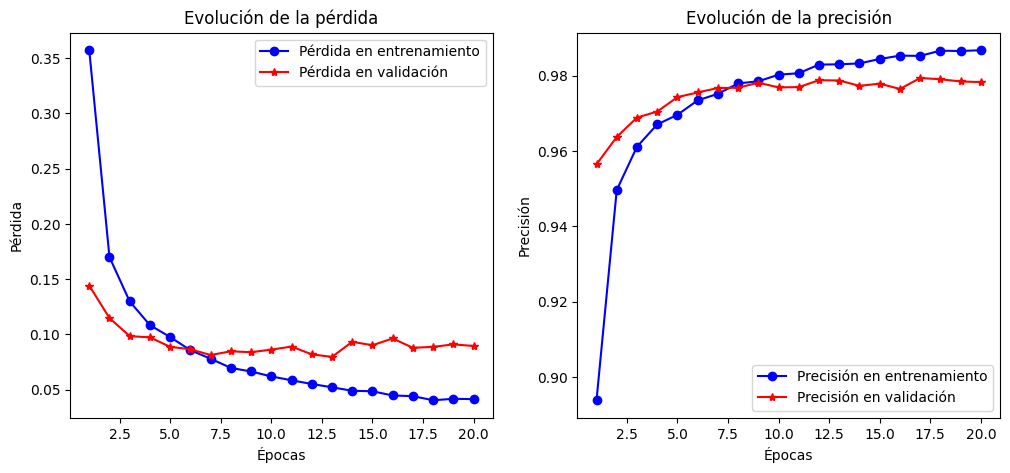

In [13]:
import matplotlib.pyplot as plt

# Extraer datos del historial de entrenamiento
history_dict = history.history
acc = history_dict['accuracy']  # Precisión en entrenamiento
val_acc = history_dict['val_accuracy']  # Precisión en validación
loss = history_dict['loss']  # Pérdida en entrenamiento
val_loss = history_dict['val_loss']  # Pérdida en validación

epochs_range = range(1, len(acc) + 1)  # Número de épocas

# 🔹 Gráfico de pérdida
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, 'bo-', label='Pérdida en entrenamiento')
plt.plot(epochs_range, val_loss, 'r*-', label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Evolución de la pérdida')
plt.legend()

# 🔹 Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, 'bo-', label='Precisión en entrenamiento')
plt.plot(epochs_range, val_acc, 'r*-', label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Evolución de la precisión')
plt.legend()

plt.show()
